<a href="https://colab.research.google.com/github/cmentus/Generative-model-workbook/blob/main/AR_process_for_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# AR processes
Takes time series of stock prices, degree (how far back to look). Calibrates, fits, and makes predictions. 

**TODO**: statistical test for stationarity.
root test for stationarity of the fitted AR process.
statistical test for GBM vs AR.


In [1]:
pip install yfinance

     |████████████████████████████████| 63 kB 864 kB/s 
     |████████████████████████████████| 6.4 MB 11.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


# AR_process class

In [8]:
import sys
!git clone https://github.com/cmentus/option_stats_models
sys.path.append( '/content/option_stats_model')
import numpy as np
import cvxpy as cp
import pandas as pd
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from option_stats_models import models
from option_stats_models.models import *

fatal: destination path 'option_stats_models' already exists and is not an empty directory.


In [46]:
#@markdown #Load asset from YF for prediction
#@markdown ---
#@markdown Choose ticker + start date for history. 
#@markdown Dates must be of the form YYYY-MM-DD \
#@markdown Past length is how far back to look when making a prediction.
symbol = "INTC"#@param {type:"string"}
history_start =  '2018-03-01' #@param {type:"string"}
history_end = '2022-04-04' #@param {type:"string"}
past_length = 10 #@param {type:"number"}
hist = yf.Ticker(symbol).history(start = history_start,end = history_end)
St = hist.Close.to_numpy()
Xt = np.log(St)
model = AR_model(St,past_length)
print('Calibrating model')
model.calibrate()
print('model calibrated')

Calibrating model
model calibrated


(11, 1)


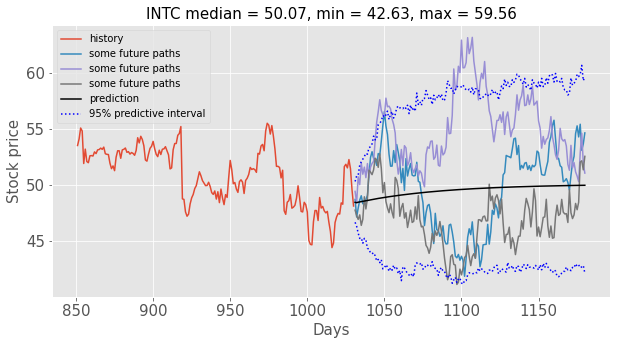

In [47]:
#@markdown #Make prediction and plot
#@markdown ---
#@markdown T_sample is the duration of sample (days).\
#@markdown n_sample is the number of samples
T_future = 150 #@param {type:"number"}
n_sample = 200 #@param {type:"number"}

prediction,samples = model.fit_predict(T_sample=150,n_sample=200)

plt.figure(figsize = (10,5))
min_price = np.mean(np.sort(samples,1)[-10:,10])
max_price = np.mean(np.sort(samples,1)[-10:,190])
if model.T>180:
    plt.plot(np.arange(model.T-180,model.T),model.St[-180:],
            label='history')
    plt.plot(np.arange(model.T,len(samples)+len(St)),samples[:,:3],
            alpha=1,linestyle='-',label = 'some future paths')
    plt.plot(np.arange(model.T,len(samples)+len(St)),prediction,color='k',
            label='prediction')
    plt.plot(np.arange(model.T,len(samples)+len(St)),np.sort(samples,1)[:,10],
            linestyle=':',color='b')
    plt.plot(np.arange(model.T,len(samples)+len(St)),np.sort(samples,1)[:,190],
            linestyle=':',color='b',label = '95% predictive interval')
else:
    plt.plot(np.arange(0,model.T),model.St[0:],
            label='history')
    plt.plot(np.arange(model.T,len(samples)+len(St)),samples[:,:3],
            alpha=1,linestyle='-',label = 'some future paths')
    plt.plot(np.arange(model.T,len(samples)+len(St)),prediction,color='k',
            label='prediction')
    plt.plot(np.arange(model.T,len(samples)+len(St)),np.sort(samples,1)[:,10],
            linestyle=':',color='b')
    plt.plot(np.arange(model.T,len(samples)+len(St)),np.sort(samples,1)[:,190],
            linestyle=':',color='b',label = '95% predictive interval')
plt.title(symbol+' median = '+"{:.2f}".format(model.get_mean()[0])+', min = '+"{:.2f}".format(min_price)+
          ', max = '+ "{:.2f}".format(max_price),fontsize=15)
plt.ylabel('Stock price',fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Days',fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=10)